# Gradient Descent
$
\begin{eqnarray}
x_{i+1}&=&x_{t} - \eta \frac{\partial F}{\partial x} \\
x_{t+1} - x_{t}&=& -\eta \frac{\partial F}{\partial x} \\
\Delta x &=& -\eta \frac{\partial F}{\partial x}
\end{eqnarray}
$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
x=[]
yt=[]
for i in range(20):
    x.append( [0.5+np.random.rand(), 0.5+np.random.rand()])
    yt.append([0 , 1])

for i in range(20):
    x.append( [-0.5+np.random.rand(), -0.5+np.random.rand()])
    yt.append([1 , 0])
    
x=np.array(x)
yt=np.array(yt)

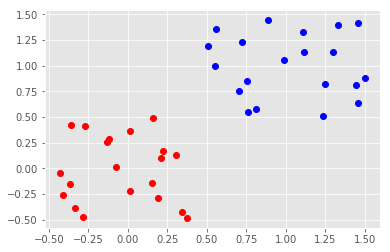

In [3]:
plt.plot( x[yt[:,1]==1,0], x[yt[:,1]==1,1], 'ob')
plt.plot( x[yt[:,0]==1,0], x[yt[:,0]==1,1], 'or')

# Single Layer Perceptron

## Error
$
\begin{eqnarray}
E&=&\frac{1}{2} (y_p-y_t)^2\\
\end{eqnarray}
$

## Input and output
$
\begin{eqnarray}
a_0 &\Leftarrow &X\\
y_p& \Leftarrow &a_1\\
\end{eqnarray}
$

## Forward Network
$
\begin{eqnarray}
z_0&=&a_0.w_0+b\\
a_1&=&g(z_0)\\
\end{eqnarray}
$

# Backpropagation on w0
$
\begin{eqnarray}
\Delta w_0 &=& -\eta \frac{\partial E}{\partial w_0}\\
\frac{\partial E}{\partial w_0} &=& \frac{\partial E}{\partial y_p} \frac{\partial y_p}{\partial a_1} \frac{\partial a_1}{\partial z_0} \frac{\partial z_0}{\partial w_0} \\
\frac{\partial E}{\partial y_p} &=& y_p-y_t \\
\frac{\partial y_p}{\partial a_1} &=& 1 \\
\frac{\partial a_1}{\partial z_0} &=& \frac{\partial g(z_0)}{\partial z_0} \\
\frac{\partial z_0}{\partial w_0} &=& a_0 \\
\end{eqnarray}
$

# Backpropagation on b0
$
\begin{eqnarray}
\Delta b_0 &=& -\eta \frac{\partial E}{\partial b_0}\\
\frac{\partial E}{\partial w_0} &=& \frac{\partial E}{\partial y_p} \frac{\partial y_p}{\partial a_1} \frac{\partial a_1}{\partial z_0} \frac{\partial z_0}{\partial b_0} \\
\frac{\partial E}{\partial y_p} &=& y_p-y_t \\
\frac{\partial y_p}{\partial a_1} &=& 1 \\
\frac{\partial a_1}{\partial z_0} &=& \frac{\partial g(z_0)}{\partial z_0} \\
\frac{\partial z_0}{\partial b_0} &=& 1 \\
\end{eqnarray}
$

In [4]:
def g(x):    
    return 1/(1+np.exp(-x))
def grad_g(g):
        return (1-g)*g

# def g(x):    
#     return np.tanh(x)
# def grad_g(g):
#         return 1-g*g

In [5]:
#random init weight and bias
np.random.seed(1)
a0=np.concatenate((x, np.ones([x.shape[0],1])), axis=1)
w0 = np.random.random((2,2)) # [3x2] 2 inputs x 2 nodes
b0 = np.random.random((1,2)) # [3x2] 1 bias x 2 nodes
wb0=np.concatenate((w0, b0), axis=0)
for i in range(100):
    #forward x=a0, a1=yp
    z0=np.dot(a0,wb0)
    a1=g(z0) 
    #backward
    d_a1=yt-a1
    d_z0=d_a1*grad_g(a1)
    d_wb0 = np.dot(a0.T,d_z0)
    
    wb0 += d_wb0
    if(i % 10) == 0:   # Only print the error every 10000 steps
        E=0.5*np.sum(np.square(d_a1))
        print("Error: {}".format(E))

Error: 9.59405970768
Error: 0.411439789765
Error: 0.265328714284
Error: 0.199316339602
Error: 0.160644073648
Error: 0.134936933573
Error: 0.116496943961
Error: 0.102574282865
Error: 0.0916659431828
Error: 0.0828760004106


In [6]:
my,mx=np.mgrid[slice(-1,2,0.01),slice(-1,2,0.01)]

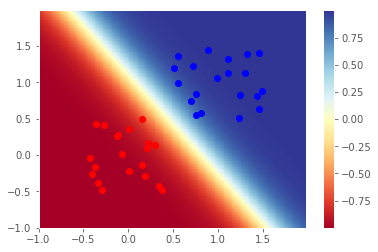

In [7]:
out=np.zeros(mx.shape)
for i in range(mx.shape[0]):
    for j in range(mx.shape[1]):
        u=[ mx[i,j], my[i,j],1]
        #forward
        hot=g(np.dot(u,wb0))
        out[i,j]=hot[1]-hot[0]
plt.pcolor(mx,my,out,cmap=cm.RdYlBu)
plt.colorbar()
plt.plot( x[yt[:,1]==1,0], x[yt[:,1]==1,1], 'ob')
plt.plot( x[yt[:,0]==1,0], x[yt[:,0]==1,1], 'or')